# Plotting and dataframes

Yesterday we started out with the gdb dataset and tried do extract some data and plot it.

Let's start with importing the libraries and telling matplotlib to render the images in between the cells (instead of opening in a seperate window) by using the `%matplotlib inline`

In [1]:
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt

Now let's open the data set and put it into a dataframe called `data`

In [2]:
data = pd.read_csv('data/gapminder_all.csv')
#print the first 5 lines  using head
data.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


"Ahh, I want the countries to be the first column."

Got ya back jack. We need to specify that the `"country"` column is the one we'll use for indexing.

In [3]:
data = pd.read_csv('data/gapminder_all.csv', index_col="country")
data.head()

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
Angola,Africa,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
Benin,Africa,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,1191.207681,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
Botswana,Africa,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,7954.111645,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
Burkina Faso,Africa,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,931.752773,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


Yesterday we asked to get some statistics on just the African contries. Pandas allows you to do this very elegantly, you only use indexing. You might remember we can use the `loc[]` command to do so:

*"You mean like this?"*

In [4]:
africa = data.loc["Africa"]

KeyError: 'the label [Africa] is not in the [index]'

Close. The problem `"Africa"` is not defined in our code, it only lives in the dataframe. So the index we need to index with is the continent of Africa:

In [6]:
africa = data.loc[data['continent'] == "Africa"]
africa.head()

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
Angola,Africa,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
Benin,Africa,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,1191.207681,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
Botswana,Africa,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,7954.111645,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
Burkina Faso,Africa,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,931.752773,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


Hmm, something fishy is going on, all these colulmns on the right are not gdp's. Let's fix this by selecting the columns we want using the `loc[]` command again

In [9]:
africa_gdp = africa.loc[:, 'gdpPercap_1952':'gdpPercap_1992']

Now we can get some statistics on Africa's gdp using the `describe()` method.

In [11]:
africa_gdp.describe()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1252.572466,1385.236062,1598.078825,2050.363801,2339.615674,2585.938508,2481.592960,2282.668991,2281.810333
std,982.952116,1134.508918,1461.839189,2847.717603,3286.853884,4142.398707,3242.632753,2566.531947,2644.075602
min,298.846212,335.997115,355.203227,412.977514,464.099504,502.319733,462.211415,389.876185,410.896824
25%,534.990554,606.954355,673.329046,779.815648,815.919804,805.612125,828.656854,764.598759,743.908497
50%,987.025569,1024.022987,1133.783677,1210.376379,1443.372508,1399.638836,1323.728306,1219.585563,1161.631357
75%,1454.886645,1573.040442,1702.219247,1890.112274,2292.258613,2841.282025,2787.582271,2786.310885,2707.896077
max,4725.295531,5487.104219,6757.030816,18772.751690,21011.497210,21951.211760,17364.275380,11864.408440,13522.157520


We could do the same for Europe:

In [12]:
europe = data.loc[data['continent'] == "Europe"]
europe_gdp = europe.loc[:, 'gdpPercap_1952':'gdpPercap_1992']
europe_gdp.describe()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5661.057435,6963.012816,8365.486814,10143.823757,12479.575246,14283.979110,15617.896551,17214.310727,17061.568084
std,3114.060493,3677.950146,4199.193906,4724.983889,5509.691411,5874.464896,6453.234827,7482.957960,9109.804361
min,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,3630.880722,3738.932735,2497.437901
25%,3241.132406,4394.874315,5373.536612,6657.939047,9057.708095,10360.030300,11449.870115,12274.570680,8667.113214
50%,5142.469716,6066.721495,7515.733738,9366.067033,12326.379990,14225.754515,15322.824720,16215.485895,17550.155945
75%,7236.794919,9597.220820,10931.085347,13277.182057,16523.017127,19052.412163,20901.729730,23321.587723,25034.243045
max,14734.232750,17909.489730,20431.092700,22966.144320,27195.113040,26982.290520,28397.715120,31540.974800,33965.661150


 ## How a figure says more than a thousand tables
 
 Now let's do some plots. Let's plot the mean of the gdb's per year:
 
 We will be very simple and plot directly from Pandas:

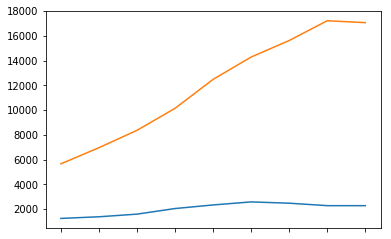

In [14]:
africa_gdp.describe().loc["mean"].plot()
europe_gdp.describe().loc["mean"].plot()

## This is nice for plotting but there's another way, which I personally use more often. It makes use of matplotlib directly, instead of going through pandas

<function matplotlib.pyplot.show(*args, **kw)>

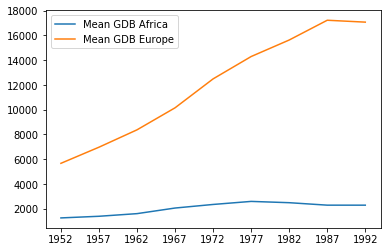

In [18]:
# make two placeholder variables for africa and europe
mean_africa = africa_gdp.describe().loc["mean"]
mean_europe = europe_gdp.describe().loc["mean"]

# Extract year from last 4 characters of each column name
years = africa_gdp.columns.str.strip('gdpPercap_')

# plot the data
plt.plot(years, mean_africa, label='Mean GDB Africa')
plt.plot(years, mean_europe, label='Mean GDB Europe')
plt.legend()
plt.show

*"Ok, I can see more now, but this plot looks kinda boring."*

Ok, let's make it prettier.

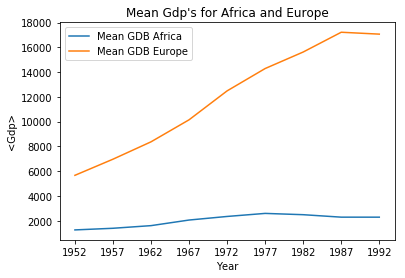

In [22]:
# plot the data
plt.plot(years, mean_africa, label='Mean GDB Africa')
plt.plot(years, mean_europe, label='Mean GDB Europe')
plt.legend()
plt.show

# let's add a title
plt.title("Mean Gdp's for Africa and Europe")

# add some axis labels
plt.xlabel("Year")
plt.ylabel("<Gdp>")
plt.show();

*"Yeah but in R I can use ggplot, that's looks soooooo pretty."*

Pfff... ok then :)

AttributeError: Unknown property kind

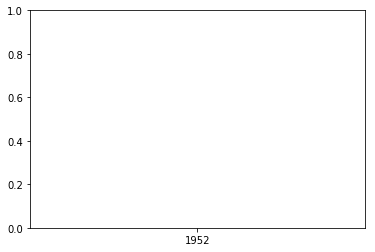

In [23]:
# plot the data (now as a bar graph)
plt.plot(years, mean_africa, label='Mean GDB Africa', kind='bar')
plt.plot(years, mean_europe, label='Mean GDB Europe', kind='bar')
plt.legend()

# let's add a title
plt.title("Mean Gdp's for Africa and Europe")

# add some axis labels
plt.xlabel("Year")
plt.ylabel("<Gdp>")

# let's plot it as using ggplot formattins
plt.style.use('ggplot')

plt.show();